<a href="https://colab.research.google.com/github/Aditya-21052131/Customer-Behavior-Analysis/blob/main/Customer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3
import pandas as pd

# Create a SQLite database connection
conn = sqlite3.connect('customer_behavior.db')
cursor = conn.cursor()

# Create a table with customer behavior data
cursor.execute('''
CREATE TABLE IF NOT EXISTS customer_behavior (
    customer_id INTEGER,
    product_id INTEGER,
    action TEXT,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
)
''')

# Insert sample data
data = [
    (1, 101, 'view', '2024-09-01 10:00:00'),
    (1, 102, 'purchase', '2024-09-01 11:00:00'),
    (2, 101, 'view', '2024-09-02 09:30:00'),
    (2, 103, 'purchase', '2024-09-02 10:30:00'),
    (3, 101, 'view', '2024-09-03 08:45:00'),
    (3, 102, 'view', '2024-09-03 09:00:00'),
    (3, 103, 'purchase', '2024-09-03 09:30:00')
]

cursor.executemany('INSERT INTO customer_behavior (customer_id, product_id, action, timestamp) VALUES (?, ?, ?, ?)', data)

# Commit the transaction and close the connection
conn.commit()

# Read the data into a DataFrame using SQL
df = pd.read_sql_query("SELECT * FROM customer_behavior", conn)
conn.close()

# Display the data
df.head()


,customer_id,product_id,action,timestamp
0,1,101,view,2024-09-01 10:00:00
1,1,102,purchase,2024-09-01 11:00:00
2,2,101,view,2024-09-02 09:30:00
3,2,103,purchase,2024-09-02 10:30:00
4,3,101,view,2024-09-03 08:45:00


In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract useful features from 'timestamp' (e.g., day, hour)
df['day'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# Display cleaned data
df.head()


Missing Values:
 customer_id    0
product_id     0
action         0
timestamp      0
dtype: int64


,customer_id,product_id,action,timestamp,day,hour
0,1,101,view,2024-09-01 10:00:00,2024-09-01,10
1,1,102,purchase,2024-09-01 11:00:00,2024-09-01,11
2,2,101,view,2024-09-02 09:30:00,2024-09-02,9
3,2,103,purchase,2024-09-02 10:30:00,2024-09-02,10
4,3,101,view,2024-09-03 08:45:00,2024-09-03,8


<ipython-input-5-fc2c328e4d53>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='action', palette='Set2')


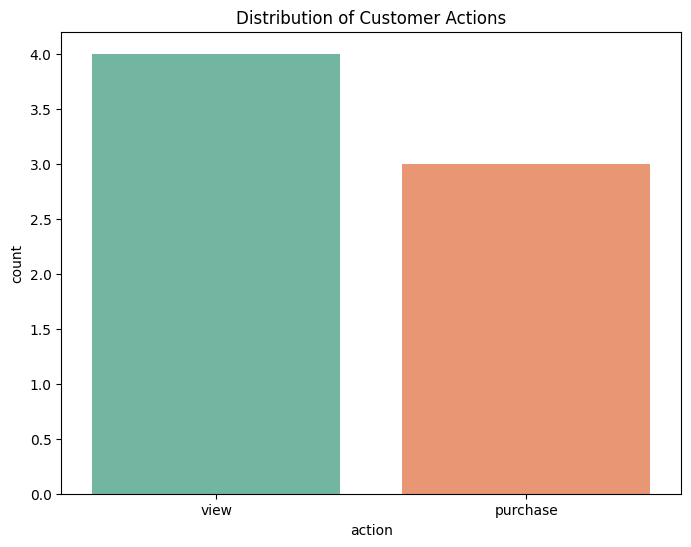

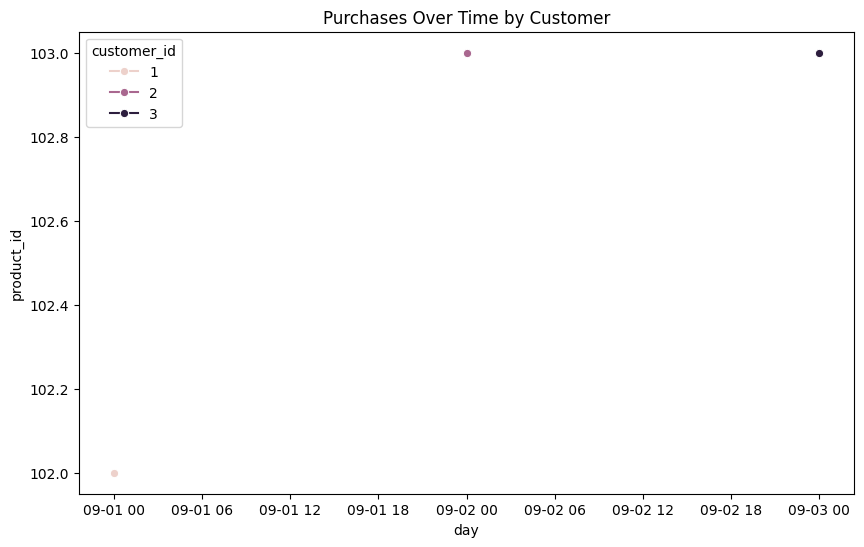

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of actions (view vs purchase)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='action', palette='Set2')
plt.title('Distribution of Customer Actions')
plt.show()

# Plot the number of purchases over time
plt.figure(figsize=(10, 6))
purchase_data = df[df['action'] == 'purchase']
sns.lineplot(data=purchase_data, x='day', y='product_id', hue='customer_id', marker='o')
plt.title('Purchases Over Time by Customer')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data for modeling
df['action_encoded'] = df['action'].map({'view': 0, 'purchase': 1})
features = df[['product_id', 'hour']]
target = df['action_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Build a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy Score: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
